<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/Weibulldataset_diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anthonytherrien/website-traffic")

print("Path to dataset files:", path)

100%|██████████| 63.7k/63.7k [00:00<00:00, 33.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/anthonytherrien/website-traffic/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/anthonytherrien/website-traffic/versions/1

website_wata.csv


   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  


(array([0.91390066, 2.02491714, 2.17723391, 2.36538993, 2.38330955,
        2.27579183, 1.65756491, 1.41565003, 0.91390066, 0.65406616,
        0.52862881, 0.3494326 , 0.16127659, 0.04479905, 0.05375886]),
 array([0.00786809, 0.06367284, 0.1194776 , 0.17528235, 0.2310871 ,
        0.28689185, 0.34269661, 0.39850136, 0.45430611, 0.51011086,
        0.56591562, 0.62172037, 0.67752512, 0.73332988, 0.78913463,
        0.84493938]),
 <BarContainer object of 15 artists>)

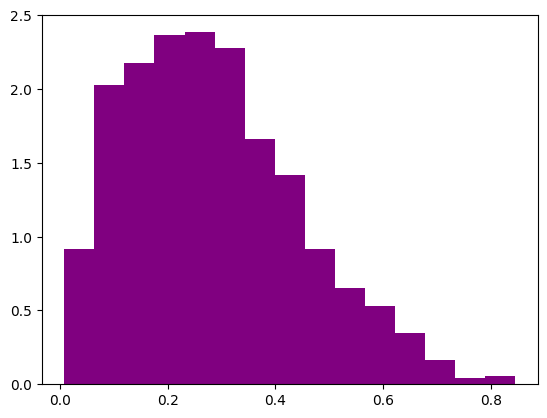

In [ ]:
#Plot the data

#libraries
from scipy.stats import norm, kstest

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


#give it the path and fetch the data
path = '/root/.cache/kagglehub/datasets/anthonytherrien/website-traffic/versions/1/website_wata.csv'
data = pd.read_csv(path)

print(data.head())

#get the data from a specific column
bounce_data = data['Bounce Rate']

#plot it
plt.hist(bounce_data, bins=15, color='purple', density=True)


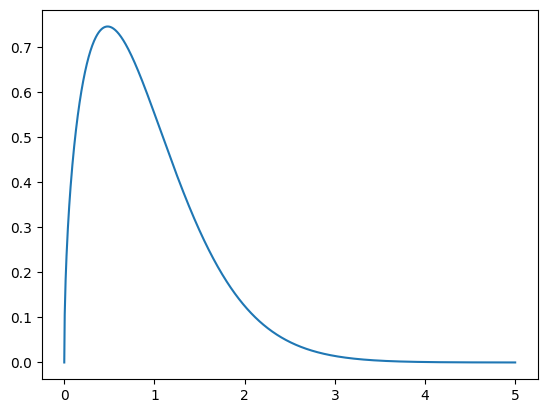

In [ ]:
#Plot the weibull

from scipy.stats import weibull_min

shape = 1.5
scale = 1

x = np.linspace(0, 5, 1000)

y = weibull_min.pdf(x, shape, scale=scale)

plt.plot(x, y)
plt.show()

KS test statistic: 0.016858256970669186, p-value: 0.6143624588095984
The data follows a Weibull distribution


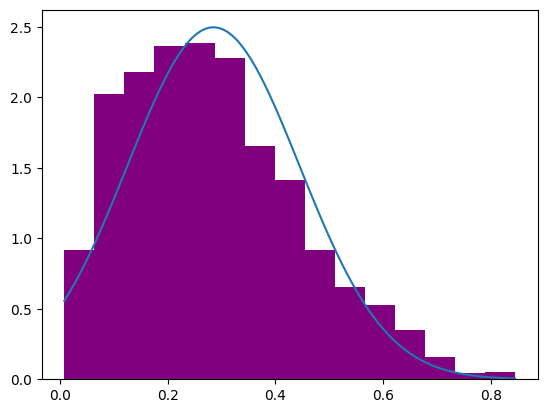

In [ ]:
#Merge the dataset

plt.hist(bounce_data, bins=15, color='purple', density=True)

mean = bounce_data.mean()
std = bounce_data.std()

x = np.linspace(min(bounce_data), max(bounce_data), 100)

y = norm.pdf(x, mean, std)

plt.plot(x,y)

#check if the wind data follows a Weibull distribution (Kolmogorov-Smirnov test)
from scipy.stats import weibull_min

#fit the data to a Weibull distribution (using MLE method)
params = weibull_min.fit(bounce_data, floc=0)  # location is fixed at 0

#perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = st.kstest(bounce_data, 'weibull_min', args=params)

print(f"KS test statistic: {ks_stat}, p-value: {ks_p_value}")

if ks_p_value > 0.05:
    print("The data follows a Weibull distribution")
else:
    print("The data does not follow a Weibull distribution")

# ***Cheatsheet***

**std** (standard deviation): measures how spread out the data is from the mean.

**mean**: the average value of a dataset.

**pdf** (probability density function): a function that shows how likely can different values appear in a continuous distribution.

**bins**: the number of divisions (bars) in a histogram to group data values.

**histogram**: a chart that represents the frequency of data points in bins.

**linspace**: generates evenly spaced numbers between a start and stop value.

# ***Resources:***

**The dataset (kaggle)**
https://www.kaggle.com/datasets/anthonytherrien/website-traffic


